In [1]:
# (1) Importing dependencies
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [2]:
## (2) Downloading required assets such as detection model

# Defining a helper function to download the assets from a URL
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assets....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

# Establishing the URL
URL = r"https://www.dropbox.com/s/xoomeq2ids9551y/opencv_bootcamp_assets_NB13.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB13.zip")

# Downloading if ZIP folder of assets doesn't exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [3]:
## (3) Checking class labels
classFile  = "coco_class_labels.txt"

with open(classFile) as fp:
    labels = fp.read().split("\n")

print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


In [4]:
## (4) Reading the TensorFlow model
# Establishing file directories to model and configuration
modelFile  = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29", "frozen_inference_graph.pb")
configFile = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29.pbtxt")

# Reading the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [5]:
## (5)  Creating a helper function for detecting objects
def detect_objects(net, im, dim = 300):

    # Create a blob from the image
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0, 0, 0), swapRB=True, crop=False)

    # Pass blob to the network
    net.setInput(blob)

    # Peform prediction
    objects = net.forward()
    return objects

In [14]:
## (6) Creating a helper function to display text annotations on the image
# Hyperparameters for image annotation
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 1.1
THICKNESS = 2

# Creating a helper function to display text annotations on the image
def display_text(im, text, x, y):
    # Get text size
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]

    # Use text size to create a black rectangle
    cv2.rectangle(
        im,
        (x, y - dim[1] - baseline),
        (x + dim[0], y + baseline),
        (0, 0, 0),
        cv2.FILLED,
    )

    # Display text inside the rectangle
    cv2.putText(
        im,
        text,
        (x, y - 5),
        FONTFACE,
        FONT_SCALE,
        (0, 255, 255),
        THICKNESS,
        cv2.LINE_AA,
    )

In [28]:
## (7) Creating a helper function to display box annotations around the detected object within the image
# Specifying colour of rectangle
RECTANGLE_COLOUR = (0, 0, 255)

def display_objects(im, objects, threshold=0.16):
    rows = im.shape[0]
    cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        
        # Find the class and confidence
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        # Recover original coordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)

        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), RECTANGLE_COLOUR, 2)

    # Convert image from BGR to RGB colour space since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30, 10))
    plt.imshow(mp_img)
    plt.show()

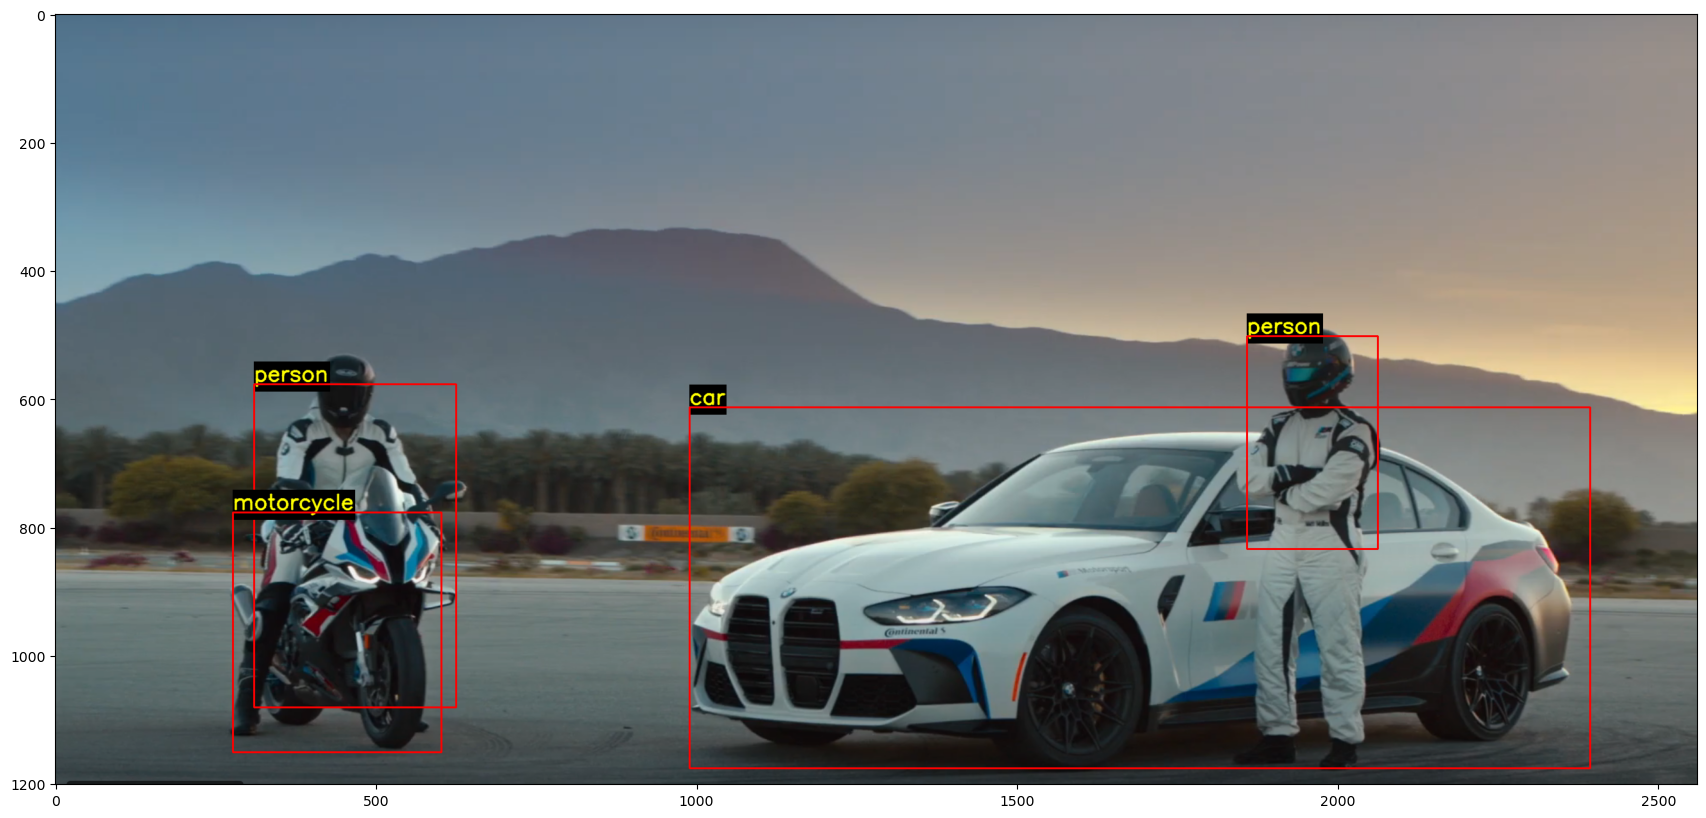

In [30]:
## (8) Displaying output of the object detection system

# Reading the input image
im = cv2.imread("Input_image.png")

# Executing the object detection function
objects = detect_objects(net, im)

# Displaying the output image that annotates the detected objects onto the input image
display_objects(im, objects)